# Test Time Augmentation

In this notebook we will impement **TTA**

>TTA refers to cropping of test(or validation) images at inference and averaging the result for a better generalization. 

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.IMAGENETTE)

Function to crop corners of Image

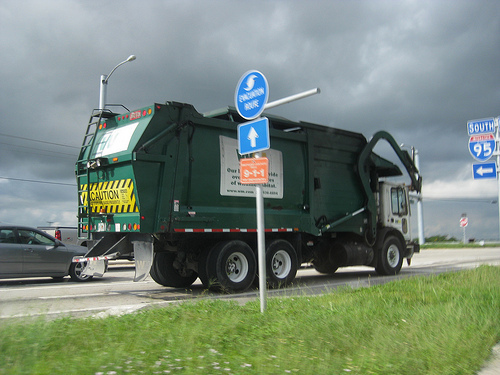

In [2]:
im_path = (path/'val').ls()[0].ls()[0]
im = Image.open(im_path)
im

In [3]:
for i, j in [(0, 0), (0, -1), (-1, 0), (-1, -1)]:
    print(i, j)

0 0
0 -1
-1 0
-1 -1


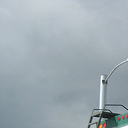

In [4]:
im.crop((0*128//8, 0*128//8, 0*128//8 + 128, 0*128//8 + 128))

In [5]:
def corner_crop(img, size):
    crops = []
    for i,j in [(0, 0), (0, -1), (-1, 0), (-1, -1)]:
        crops.append(img.crop((i*size//8, j*size//8, i*size//8 + size, j**size//8 + size)))
    return crops

In [6]:
def display_crops(corner_crops):
    """Displays the four corner crops in a 2x2 grid."""
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(corner_crops[i])
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

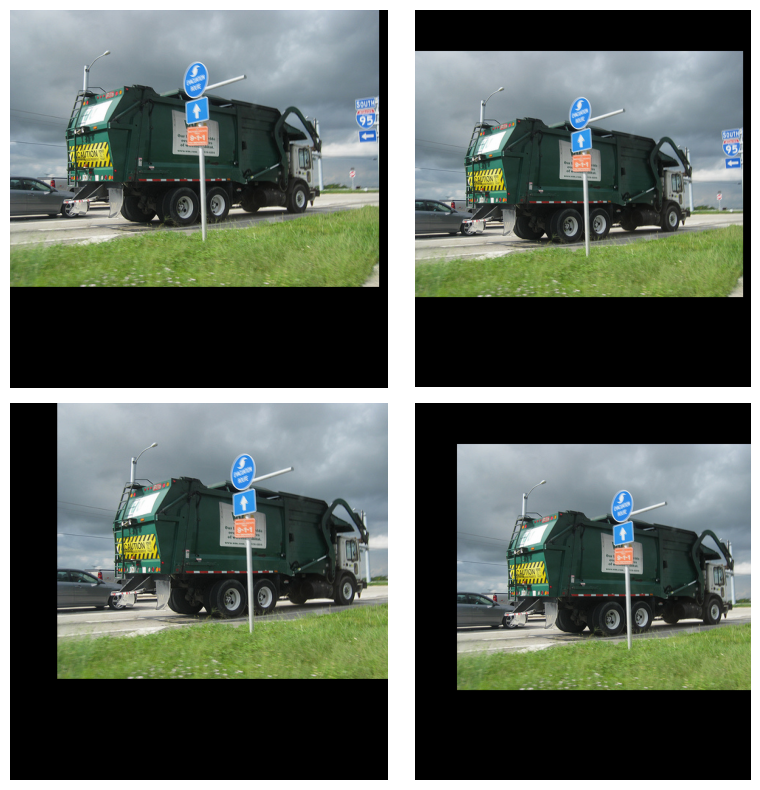

In [7]:
a,b,c,d = corner_crop(im, 512)
display_crops([a,b,c,d])

In [8]:
im.size

(500, 375)

img size -> 500, 375

crop coord -> 0*256//8 -> 0, 32, -32, 288, 224

In [9]:
-256//8 + 256

224

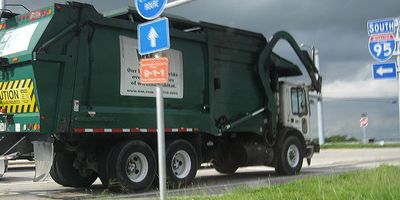

In [10]:
im.crop((100, 100, 500, 300))

## Centre Crop

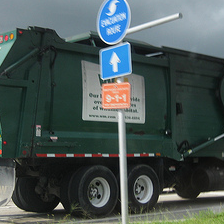

In [15]:
im.crop_pad(224)

In [13]:
# ??CropPad